In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import scipy.stats as stats
mpl.rcParams['figure.dpi'] = 100
mpl.rcParams['figure.figsize'] = (8, 6)
%config InlineBackend.figure_format = 'retina'

In [39]:
path_to_results = '/home/ng213/pazy_code/pazy-aepw3-results/05_StraightWingFlutter/'

In [118]:
results = {}

results['sharpy_wo_skin'] = {'path': path_to_results + '/skin_off/',
                            'skin': False,
                             'label': 'Skin off',
                            'marker_style': {'facecolor': 'none',
                                            'marker': 'o',
                                            'linewidth': 0.5}}

results['sharpy_w_skin'] = {'path': path_to_results + '/skin_on/',
                            'skin': True,
                             'label': 'Skin on',
                            'marker_style': {'facecolor': 'none',
                                             'marker': '^',
                                            'linewidth': 0.5}}

results['sharpy_wo_skin_te'] = {'path': path_to_results + '/skin_offte_mass/',
                            'skin': False,
                             'label': 'Skin off, TE mass',
                                'marker_style': {'facecolor': 'none',
                                             'marker': 'o',
                                            'linewidth': 0.5}}

results['sharpy_w_skin_te'] = {'path': path_to_results + '/skin_onte_mass/',
                                'skin': True,
                               'label': 'Skin on, TE mass',
                               'marker_style': {'facecolor': 'none',
                                             'marker': '^',
                                            'linewidth': 0.5}}

In [119]:
for case in results.values():
    case['eigs'] = np.loadtxt(case['path'] + '/vel_eigs.txt')
    case['vg'] = np.loadtxt(case['path'] + '/stability_analysis.txt')
    with open(case['path'] + '/flutter.txt', 'r') as f:
        case['flutter_str'] = f.read()

In [120]:
for k, case in results.items():
    print(k)
    print('\t' + case['flutter_str'])

sharpy_wo_skin
	Flutter speed = 63.0035 m/s
sharpy_w_skin
	Flutter speed = 80.0031 m/s
sharpy_wo_skin_te
	Flutter speed = 84.0064 m/s
sharpy_w_skin_te
	Flutter speed = 85.0009 m/s


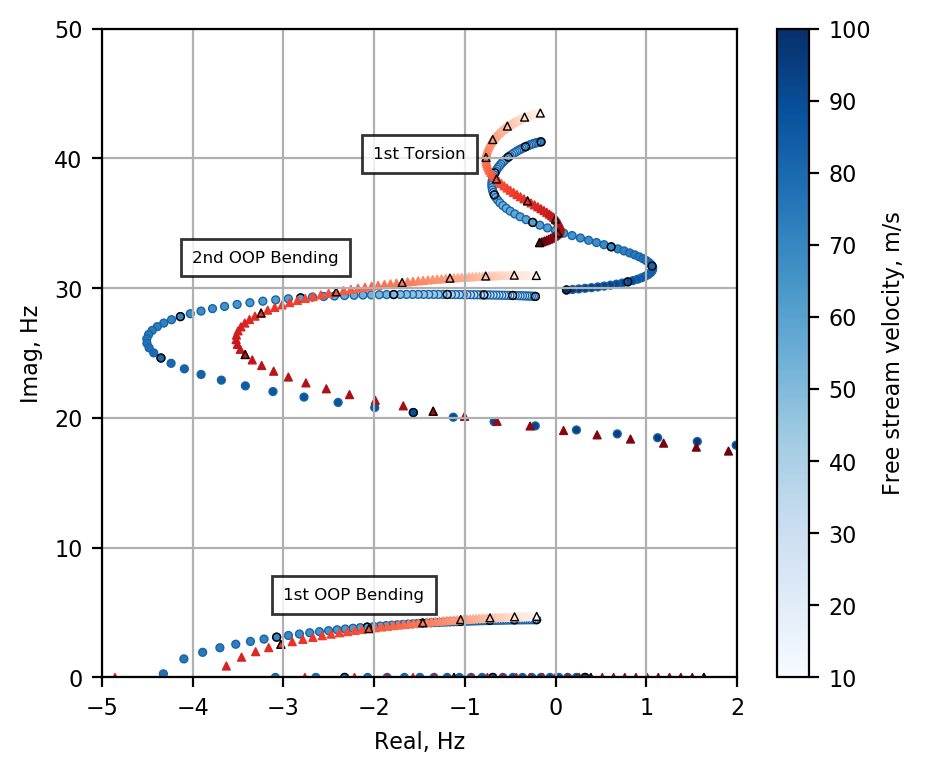

In [166]:
cm2in = 1/2.54
ar = 1.2
width_cm = 12

figsize = (width_cm * cm2in, width_cm / ar * cm2in)
fig, ax = plt.subplots(ncols=1, figsize=figsize)

for name, case in results.items():
    if case['skin']:
        a = ax
        cmap='Reds'
#         lab = 'Skin on'
    else:
        a = ax
        cmap='Blues'
#         lab = 'Skin off'
        
    if 'te' in name:
        continue
        cmap = 'Greens'
    a.scatter(case['eigs'][:, 1] / 2 /np.pi, case['eigs'][:, 2]/2/np.pi, c=case['eigs'][:, 0], cmap=cmap,
             s=8, **case['marker_style'], label=case['label'])
    
    for vel in np.linspace(10, 120, 12):
        vel_ind = (case['eigs'][:, 0] == vel)
        a.scatter(case['eigs'][vel_ind, 1] / 2/np.pi, case['eigs'][vel_ind, 2]/2/np.pi, marker=case['marker_style']['marker'], color='none', edgecolor='k', s=8, linewidth=0.5)
    
    
# # mode description
ax.text(-3, 6, '1st OOP Bending', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=6)
ax.text(-3.2, 32, '2nd OOP Bending', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=6, horizontalalignment='center')
ax.text(-1.5, 40, '1st Torsion', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=6, horizontalalignment='center')


# for a in ax
a.set_xlim(-5, 2)
a.set_ylim(0., 50)
a.grid()
a.set_xlabel('Real, Hz')
a.set_ylabel('Imag, Hz')

sm = mpl.cm.ScalarMappable(norm=plt.Normalize(vmin=10, vmax=100), cmap='Blues')
cb = plt.colorbar(sm, ax=a)
cb.set_label('Free stream velocity, m/s', fontsize=8)
cb.ax.tick_params(labelsize=8)


for item in ([a.title, a.xaxis.label, a.yaxis.label] +
             a.get_xticklabels() + a.get_yticklabels()):
    item.set_fontsize(8)
# plt.legend(fontsize=8)
plt.tight_layout()
plt.savefig('../figures/04_StraightFlutterEigs.pdf')

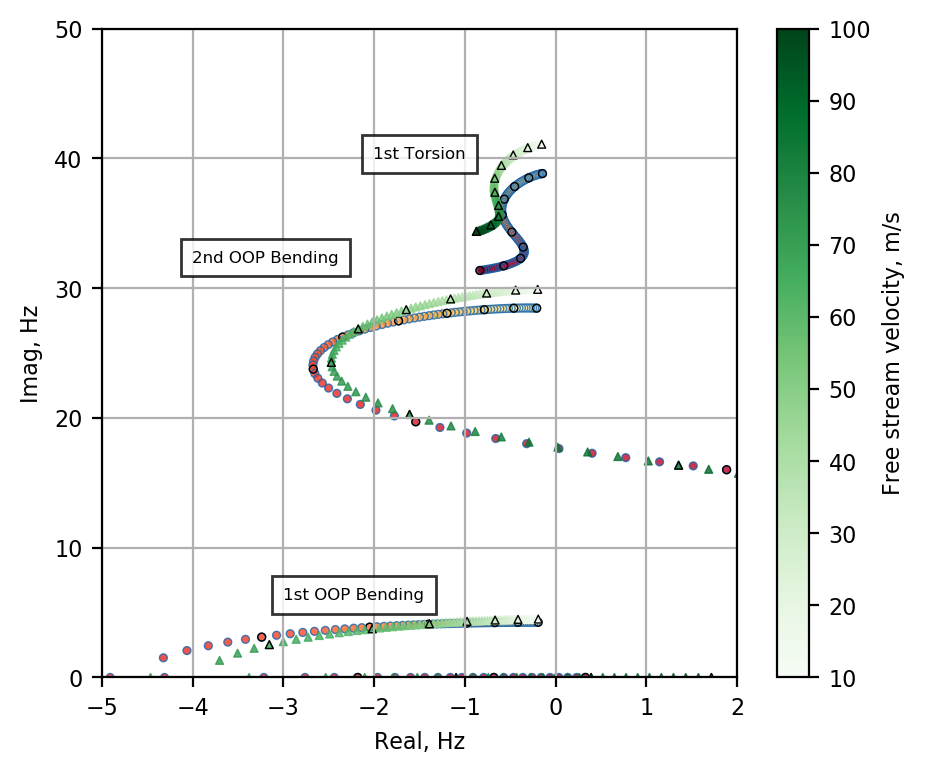

In [186]:
cm2in = 1/2.54
ar = 1.2
width_cm = 12

figsize = (width_cm * cm2in, width_cm / ar * cm2in)
fig, ax = plt.subplots(ncols=1, figsize=figsize)

for name, case in results.items():
    if case['skin']:
        a = ax
        cmap='Greens'
#         lab = 'Skin on'
    else:
        a = ax
        cmap='YlOrRd'
#         lab = 'Skin off'

    if 'te' not in name:
        continue
#         cmap = 'Greens'

    a.scatter(case['eigs'][:, 1] / 2 /np.pi, case['eigs'][:, 2]/2/np.pi, c=case['eigs'][:, 0], cmap=cmap,
             s=8, **case['marker_style'], label=case['label'])

    for vel in np.linspace(10, 120, 12):
        vel_ind = (case['eigs'][:, 0] == vel)
        a.scatter(case['eigs'][vel_ind, 1] / 2/np.pi, case['eigs'][vel_ind, 2]/2/np.pi, marker=case['marker_style']['marker'], color='none', edgecolor='k', s=8, linewidth=0.5)
    
    
# # mode description
ax.text(-3, 6, '1st OOP Bending', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=6)
ax.text(-3.2, 32, '2nd OOP Bending', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=6, horizontalalignment='center')
ax.text(-1.5, 40, '1st Torsion', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=6, horizontalalignment='center')


# for a in ax
a.set_xlim(-5, 2)
a.set_ylim(0., 50)
a.grid()
a.set_xlabel('Real, Hz')
a.set_ylabel('Imag, Hz')

sm = mpl.cm.ScalarMappable(norm=plt.Normalize(vmin=10, vmax=100), cmap='Greens')
cb = plt.colorbar(sm, ax=a)
cb.set_label('Free stream velocity, m/s', fontsize=8)
cb.ax.tick_params(labelsize=8)


for item in ([a.title, a.xaxis.label, a.yaxis.label] +
             a.get_xticklabels() + a.get_yticklabels()):
    item.set_fontsize(8)
# plt.legend(fontsize=8)
plt.tight_layout()
plt.savefig('../figures/04_StraightFlutterEigs_TE.pdf')

(0.09019607843137256, 0.39294117647058824, 0.6705882352941177, 1.0)
(0.09019607843137256, 0.39294117647058824, 0.6705882352941177, 1.0)


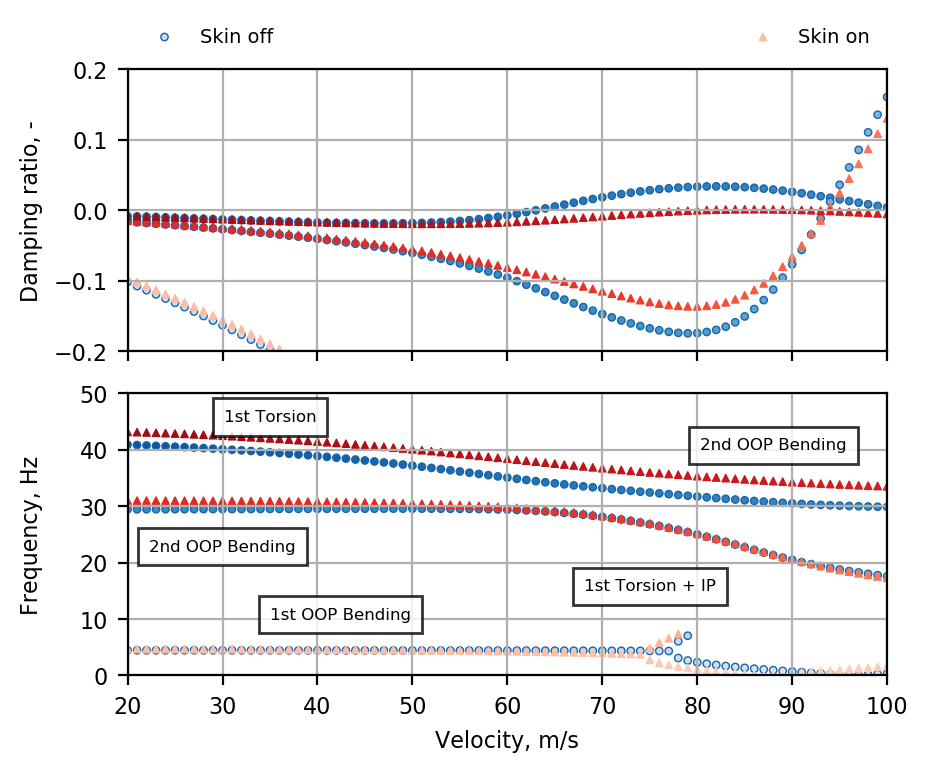

In [163]:
cm2in = 1/2.54
ar = 1.2
width_cm = 12

figsize = (width_cm * cm2in, width_cm / ar * cm2in)
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=figsize)
nrm2 = plt.Normalize(vmin=-10, vmax=50)

for name, case in results.items():
    if case['skin']:
        cmap = plt.get_cmap('Reds')
        color=plt.get_cmap('Reds')(1.0)
        lab = 'Skin on'
        try:
            del case['marker_style']['facecolor']
        except KeyError:
            pass
#         case['marker_style']['facecolor'] = color
    else:
        color=plt.get_cmap('Blues')(0.8)
        cmap = plt.get_cmap('Blues')
        print(color)
        lab = 'Skin off'
#         case['marker_style']['facecolor'] = 'none'
#         case['marker_style']['edgecolor'] = color
        try:
            del case['marker_style']['facecolor']
        except KeyError:
            pass
    cond = case['vg'][:, 2] < 50
    if 'te' in name:
        continue
        color='tab:green'
        case['marker_style']['alpha'] = 0.8
        case['marker_style']['facecolor'] = 'none'
        


    ax[0].scatter(case['vg'][cond, 0], case['vg'][cond, 1], s=7, facecolor=cmap(nrm2(case['vg'][cond, 2])), label=case['label'], **case['marker_style'])
    ax[1].scatter(case['vg'][cond, 0], case['vg'][cond, 2], s=7, facecolor=cmap(nrm2(case['vg'][cond, 2])),
                  **case['marker_style'])
    
ax[0].set_ylim(-0.2, 0.2)
ax[0].grid()
ax[1].set_ylim(0, 50)
ax[1].grid()
ax[1].set_xlabel('Velocity, m/s')
ax[1].set_ylabel('Frequency, Hz')
ax[0].set_ylabel('Damping ratio, -')
ax[1].set_xlim(20, 100)
ax[0].legend(frameon=False, bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", ncol=4, mode='expand', fontsize=7)


# ax[0].legend(fontsize=8)
# ax[0].set_title('Skin off')

# mode description
ax[1].text(35, 10, '1st OOP Bending', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=6)
ax[1].text(30, 22, '2nd OOP Bending', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=6, horizontalalignment='center')
ax[1].text(35, 45, '1st Torsion', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=6, horizontalalignment='center')

ax[1].text(88, 40, '2nd OOP Bending', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=6, horizontalalignment='center')
ax[1].text(75, 15, '1st Torsion + IP', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=6, horizontalalignment='center')


for a in ax:
    for item in ([a.title, a.xaxis.label, a.yaxis.label] +
             a.get_xticklabels() + a.get_yticklabels()):
        item.set_fontsize(8)

# ax[0].set_ylim(-0.01, 0.01)
plt.tight_layout()
fig.align_ylabels(ax)
plt.savefig('../figures/04_StraightFlutterVg.pdf')

(0.09019607843137256, 0.39294117647058824, 0.6705882352941177, 1.0)
(0.09019607843137256, 0.39294117647058824, 0.6705882352941177, 1.0)


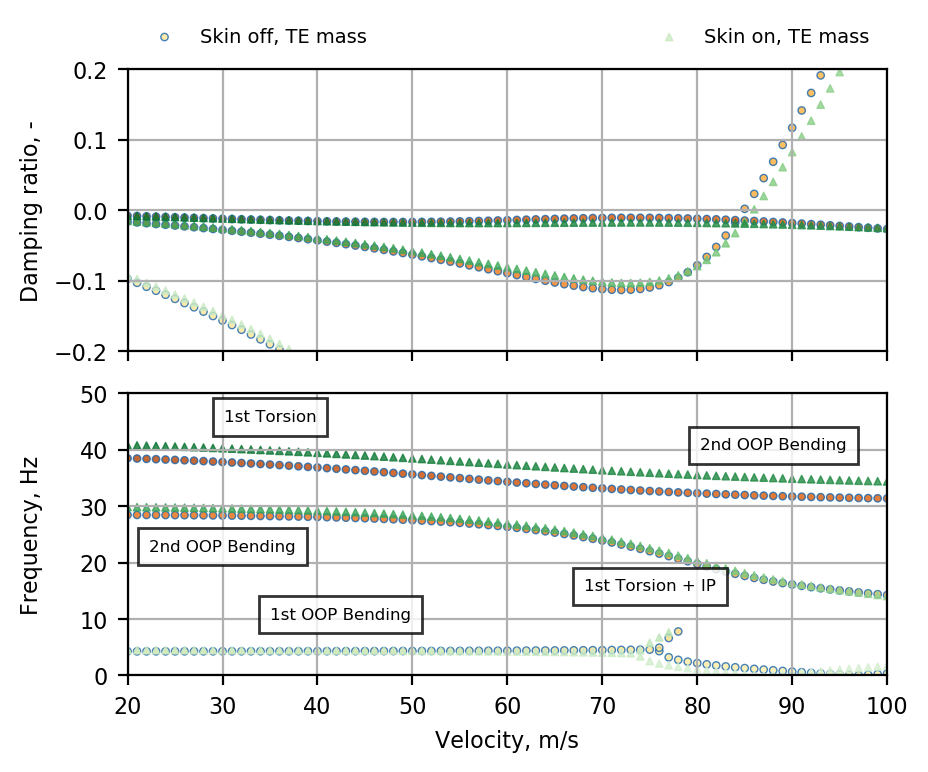

In [185]:
cm2in = 1/2.54
ar = 1.2
width_cm = 12

figsize = (width_cm * cm2in, width_cm / ar * cm2in)
fig, ax = plt.subplots(nrows=2, sharex=True, figsize=figsize)
nrm2 = plt.Normalize(vmin=-10, vmax=50)

for name, case in results.items():
    if case['skin']:
        cmap = plt.get_cmap('Greens')
        color=plt.get_cmap('Reds')(1.0)
        lab = 'Skin on'
        try:
            del case['marker_style']['facecolor']
            del case['marker_style']['edgecolor']


        except KeyError:
            pass
#         case['marker_style']['facecolor'] = color
    else:
        color=plt.get_cmap('Blues')(0.8)
        cmap = plt.get_cmap('YlOrBr')
        print(color)
        lab = 'Skin off'
#         case['marker_style']['facecolor'] = 'none'
#         case['marker_style']['edgecolor'] = color
        try:
            del case['marker_style']['facecolor']
            del case['marker_style']['edgecolor']

        except KeyError:
            pass
    cond = case['vg'][:, 2] < 50
    if 'te' not in name:
        continue


    ax[0].scatter(case['vg'][cond, 0], case['vg'][cond, 1], s=7, color=cmap(nrm2(case['vg'][cond, 2])), label=case['label'], **case['marker_style'])
    ax[1].scatter(case['vg'][cond, 0], case['vg'][cond, 2], s=7, color=cmap(nrm2(case['vg'][cond, 2])),
                  **case['marker_style'])
    
ax[0].set_ylim(-0.2, 0.2)
ax[0].grid()
ax[1].set_ylim(0, 50)
ax[1].grid()
ax[1].set_xlabel('Velocity, m/s')
ax[1].set_ylabel('Frequency, Hz')
ax[0].set_ylabel('Damping ratio, -')
ax[1].set_xlim(20, 100)
ax[0].legend(frameon=False, bbox_to_anchor=(0,1.02,1,0.2), loc="lower left", ncol=4, mode='expand', fontsize=7)


# ax[0].legend(fontsize=8)
# ax[0].set_title('Skin off')

# mode description
ax[1].text(35, 10, '1st OOP Bending', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=6)
ax[1].text(30, 22, '2nd OOP Bending', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=6, horizontalalignment='center')
ax[1].text(35, 45, '1st Torsion', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=6, horizontalalignment='center')

ax[1].text(88, 40, '2nd OOP Bending', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=6, horizontalalignment='center')
ax[1].text(75, 15, '1st Torsion + IP', bbox={'facecolor': 'white', 'alpha': 0.8}, fontsize=6, horizontalalignment='center')


for a in ax:
    for item in ([a.title, a.xaxis.label, a.yaxis.label] +
             a.get_xticklabels() + a.get_yticklabels()):
        item.set_fontsize(8)

# ax[0].set_ylim(-0.01, 0.01)
plt.tight_layout()
fig.align_ylabels(ax)
plt.savefig('../figures/04_StraightFlutterVg_TE.pdf')